In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

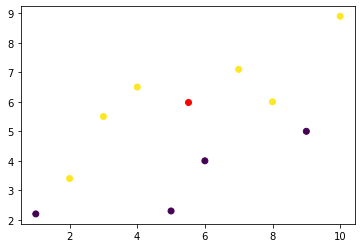

In [7]:
df = pd.DataFrame({
    'x':[1,2,3,4,5,6,7,8,9,10],
    'y':[2.2,3.4,5.5,6.5,2.3,4,7.1,6,5,8.9],
    'z':[0,1,1,1,0,0,1,1,0,1]
})
plt.scatter(df['x'],df['y'],c=df['z'])
plt.scatter(5.5,6,color='r')

In [5]:
def ed(x1,x2,y1,y2):
    return np.sqrt((x1-y1)**2 + (x2-y2)**2)

In [8]:
ed(5.5,6,4,6.5)

1.5811388300841898

In [9]:
ed(5.5,6,6,4)

2.0615528128088303

In [10]:
ed(5.5,6,7,7.1)

1.8601075237738272

In [12]:
np.argmin([1.58,2.0615])

0

In [14]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [23]:
data = data.drop(columns='User ID')

In [24]:
LB = LabelEncoder()

In [25]:
data['Gender'] = LB.fit_transform(data['Gender'])

In [26]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [31]:
sc = StandardScaler()
data[['Age','EstimatedSalary']]=sc.fit_transform(data[['Age','EstimatedSalary']])

In [32]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.781797,-1.490046,0
1,1,-0.253587,-1.460681,0
2,0,-1.113206,-0.785290,0
3,0,-1.017692,-0.374182,0
4,1,-1.781797,0.183751,0


In [37]:
x = data.iloc[:,0:3]
x

,Gender,Age,EstimatedSalary
0,1,-1.781797,-1.490046
1,1,-0.253587,-1.460681
2,0,-1.113206,-0.785290
3,0,-1.017692,-0.374182
4,1,-1.781797,0.183751
...,...,...,...
395,0,0.797057,-0.844019
396,1,1.274623,-1.372587
397,0,1.179110,-1.460681
398,1,-0.158074,-1.078938


In [39]:
y = data.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [44]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
y_predict = knn.predict(x_test)

In [48]:
confusion_matrix(y_test,y_predict)

array([[47,  5],
       [ 1, 27]], dtype=int64)

In [50]:
accuracy_score(y_test,y_predict)

0.925